In [27]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/krunch-data/loc1_Jun-23.xlsx
/kaggle/input/krunch-data/loc2_Aug-23.xlsx
/kaggle/input/krunch-data/loc1_Feb-24.xlsx
/kaggle/input/krunch-data/loc2_May-23.xlsx
/kaggle/input/krunch-data/loc2_Sep-23.xlsx
/kaggle/input/krunch-data/loc2_Oct-23.xlsx
/kaggle/input/krunch-data/loc2_Dec-23.xlsx
/kaggle/input/krunch-data/loc1_Jul-23.xlsx
/kaggle/input/krunch-data/loc1_Dec-23.xlsx
/kaggle/input/krunch-data/loc1_Aug-23.xlsx
/kaggle/input/krunch-data/loc2_Nov-23.xlsx
/kaggle/input/krunch-data/loc1_Nov-23.xlsx
/kaggle/input/krunch-data/loc1_Jan-24.xlsx
/kaggle/input/krunch-data/loc1_Sep-23.xlsx
/kaggle/input/krunch-data/loc2_Mar-24.xlsx
/kaggle/input/krunch-data/loc1_May-23.xlsx
/kaggle/input/krunch-data/loc1_Apr-23.xlsx
/kaggle/input/krunch-data/loc2_Feb-24.xlsx
/kaggle/input/krunch-data/loc2_Jan-24.xlsx
/kaggle/input/krunch-data/loc2_Jun-23.xlsx
/kaggle/input/krunch-data/loc1_Mar-24.xlsx
/kaggle/input/krunch-data/loc2_Apr-23.xlsx
/kaggle/input/krunch-data/loc1_Oct-23.xlsx
/kaggle/inp

Combining the data for all 12 months of location 1 in a datframe and adding a column displaying the month.

In [28]:
import pandas as pd

# List of file paths and corresponding month names
file_paths = [
    '/kaggle/input/krunch-data/loc1_Apr-23.xlsx', '/kaggle/input/krunch-data/loc1_May-23.xlsx', '/kaggle/input/krunch-data/loc1_Jun-23.xlsx', '/kaggle/input/krunch-data/loc1_Jul-23.xlsx', 
    '/kaggle/input/krunch-data/loc1_Aug-23.xlsx', '/kaggle/input/krunch-data/loc1_Sep-23.xlsx', '/kaggle/input/krunch-data/loc1_Oct-23.xlsx', '/kaggle/input/krunch-data/loc1_Nov-23.xlsx',
    '/kaggle/input/krunch-data/loc1_Dec-23.xlsx', '/kaggle/input/krunch-data/loc1_Jan-24.xlsx', '/kaggle/input/krunch-data/loc1_Feb-24.xlsx', '/kaggle/input/krunch-data/loc1_Mar-24.xlsx'
]
months = [
    '2023-04', '2023-05', '2023-06', '2023-07', '2023-08',
    '2023-09', '2023-10', '2023-11', '2023-12','2024-01', '2024-02', '2024-03', 
]



# List to hold data from each file
data_frames = []

# Read each file, add month column, and append to data_frames list
for file, month in zip(file_paths, months):
    # Read the data, skip headers for all but the first file
    data = pd.read_excel(file, sheet_name='data', header=0 if file == file_paths[0] else None)
    # Add month column
    data['Month'] = month
    
    # If not the first file, set column names to match the first file's columns
    if file != file_paths[0]:
        data.columns = data_frames[0].columns
    
    
    
    # Append data to the list
    data_frames.append(data)

# Concatenate all data frames
combined_data = pd.concat(data_frames, ignore_index=True)

# Display the combined data
combined_data.head()


,icode,Mment,IndentQty,ProductionQty,DespatchQty,BalanceQty,IndentValue,ProductionValue,DespatchValue,BalanceValue,sno,Month
0,21613,KGS,23831,0,0,23831,23831000,0,0,23831000,1,2023-04
1,8858,PICES,18565,0,0,18565,377612,0,0,377612,2,2023-04
2,2188,NOS,8785,1666,1627,7158,509881,96695,94431,415450,3,2023-04
3,2189,NOS,7629,1473,1490,6139,442787,85493,86480,356308,4,2023-04
4,22219,NOS,6302,0,2171,4131,534536,0,184144,350391,5,2023-04


In [29]:
combined_data.shape

(4780, 12)

Checking for null values

In [30]:
combined_data.isnull().sum()

icode              0
Mment              0
IndentQty          0
ProductionQty      0
DespatchQty        0
BalanceQty         0
IndentValue        0
ProductionValue    0
DespatchValue      0
BalanceValue       0
sno                0
Month              0
dtype: int64

In [31]:
df_1=combined_data
df_1.head()

,icode,Mment,IndentQty,ProductionQty,DespatchQty,BalanceQty,IndentValue,ProductionValue,DespatchValue,BalanceValue,sno,Month
0,21613,KGS,23831,0,0,23831,23831000,0,0,23831000,1,2023-04
1,8858,PICES,18565,0,0,18565,377612,0,0,377612,2,2023-04
2,2188,NOS,8785,1666,1627,7158,509881,96695,94431,415450,3,2023-04
3,2189,NOS,7629,1473,1490,6139,442787,85493,86480,356308,4,2023-04
4,22219,NOS,6302,0,2171,4131,534536,0,184144,350391,5,2023-04


Combining the data for all 12 months of location 2 in a datframe and adding a column displaying the month.

In [32]:
import pandas as pd

# List of file paths and corresponding month names
file_paths = [
    '/kaggle/input/krunch-data/loc2_Apr-23.xlsx', '/kaggle/input/krunch-data/loc2_May-23.xlsx', '/kaggle/input/krunch-data/loc2_Jun-23.xlsx', '/kaggle/input/krunch-data/loc2_Jul-23.xlsx', 
    '/kaggle/input/krunch-data/loc2_Aug-23.xlsx', '/kaggle/input/krunch-data/loc2_Sep-23.xlsx', '/kaggle/input/krunch-data/loc2_Oct-23.xlsx', '/kaggle/input/krunch-data/loc2_Nov-23.xlsx',
    '/kaggle/input/krunch-data/loc2_Dec-23.xlsx', '/kaggle/input/krunch-data/loc2_Jan-24.xlsx', '/kaggle/input/krunch-data/loc2_Feb-24.xlsx', '/kaggle/input/krunch-data/loc2_Mar-24.xlsx'
]
months = [
    '2023-04', '2023-05', '2023-06', '2023-07', '2023-08',
    '2023-09', '2023-10', '2023-11', '2023-12','2024-01', '2024-02', '2024-03', 
]



# List to hold data from each file
data_frames = []

# Read each file, add month column, and append to data_frames list
for file, month in zip(file_paths, months):
    # Read the data, skip headers for all but the first file
    data = pd.read_excel(file, sheet_name='data', header=0 if file == file_paths[0] else None)
    # Add month column
    data['Month'] = month
    # If not the first file, set column names to match the first file's columns
    if file != file_paths[0]:
        data.columns = data_frames[0].columns
    
    
    
    # Append data to the list
    data_frames.append(data)

# Concatenate all data frames
df_2 = pd.concat(data_frames, ignore_index=True)

# Display the combined data
df_2.head()


,icode,Mment,IndentQty,ProductionQty,DespatchQty,BalanceQty,IndentValue,ProductionValue,DespatchValue,BalanceValue,sno,Month
0,8858,PICES,55380,2078,1963,53417,1107600,41560,39260,1068340,1,2023-04
1,22960,NOS,53791,13940,13950,39841,1680969,435625,435938,1245031,2,2023-04
2,22219,NOS,40257,14632,12082,28175,3414599,1241086,1024795,2389804,3,2023-04
3,22258,NOS,48419,26417,28122,20297,4106900,2240690,2385308,1721592,4,2023-04
4,22215,NOS,42355,23250,25087,17268,3592551,1972065,2127879,1464672,5,2023-04


Looking at statistics for location 1

In [33]:
df_1.describe()

,icode,Mment,IndentQty,ProductionQty,DespatchQty,BalanceQty,IndentValue,ProductionValue,DespatchValue,BalanceValue,sno,Month
count,4780,4780,4780,4780,4780,4780,4780,4780,4780,4780,4780,4780
unique,1011,8,1951,1351,1641,1478,3922,2239,3114,3865,472,12
top,1962,NOS,1,0,0,1,0,0,0,0,1,2023-11
freq,11,2379,185,2438,1449,172,251,2486,1517,337,12,472


Looking at statistics for location 2

In [34]:
df_2.describe()

,icode,Mment,IndentQty,ProductionQty,DespatchQty,BalanceQty,IndentValue,ProductionValue,DespatchValue,BalanceValue,sno,Month
count,7589,7589,7589,7589,7589,7589,7589,7589,7589,7589,7589,7589
unique,1665,9,3010,2412,2384,2415,5493,3425,3981,5368,665,12
top,2179,NOS,2,0,0,2,0,0,0,0,1,2023-11
freq,11,4518,324,3744,3065,316,754,3980,3312,863,12,665


In [35]:
df1=df_1.copy()
df2=df_2.copy()

Understanding the characteristics of df_1

In [36]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4780 entries, 0 to 4779
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   icode            4780 non-null   object
 1   Mment            4780 non-null   object
 2   IndentQty        4780 non-null   object
 3   ProductionQty    4780 non-null   object
 4   DespatchQty      4780 non-null   object
 5   BalanceQty       4780 non-null   object
 6   IndentValue      4780 non-null   object
 7   ProductionValue  4780 non-null   object
 8   DespatchValue    4780 non-null   object
 9   BalanceValue     4780 non-null   object
 10  sno              4780 non-null   object
 11  Month            4780 non-null   object
dtypes: object(12)
memory usage: 448.2+ KB


Changing the data types of numeric columns to float for better visualisations

In [37]:
df_1['ProductionQty'] = pd.to_numeric(df_1['ProductionQty'], errors='coerce')


In [38]:
df_1.dtypes

icode               object
Mment               object
IndentQty           object
ProductionQty      float64
DespatchQty         object
BalanceQty          object
IndentValue         object
ProductionValue     object
DespatchValue       object
BalanceValue        object
sno                 object
Month               object
dtype: object

In [39]:
df_1['IndentQty'] = pd.to_numeric(df_1['IndentQty'], errors='coerce')
df_1['DespatchQty'] = pd.to_numeric(df_1['DespatchQty'], errors='coerce')
df_1['BalanceQty'] = pd.to_numeric(df_1['BalanceQty'], errors='coerce')
df_1['IndentValue'] = pd.to_numeric(df_1['IndentValue'], errors='coerce')
df_1['ProductionValue'] = pd.to_numeric(df_1['ProductionValue'], errors='coerce')
df_1['DespatchValue'] = pd.to_numeric(df_1['DespatchValue'], errors='coerce')
df_1['BalanceValue'] = pd.to_numeric(df_1['BalanceValue'], errors='coerce')

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

The following Regression plot denotes a positive linear regression between Despatch quantity and Indent Quantity forr location 1 which shows that when indent quantity is more despatched quantity also increases, but it also shows that the indent and despatch quantity values are more closer when indent quantity is low but values are afar incase of higher indent quantity

<Axes: xlabel='IndentQty', ylabel='DespatchQty'>

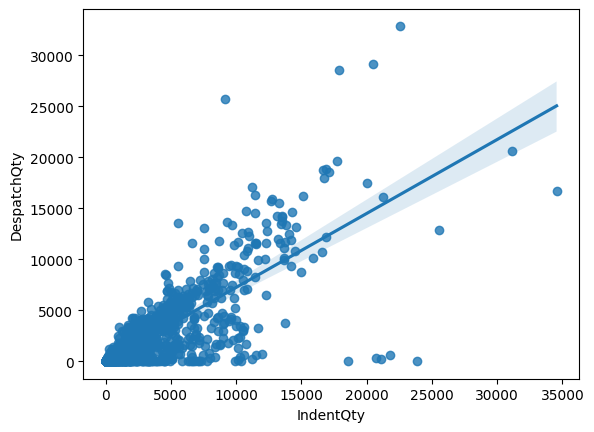

In [41]:
sns.regplot(data=df_1,y='DespatchQty',x='IndentQty',label='Indent',marker='o')


In [42]:
df_2['IndentQty'] = pd.to_numeric(df_2['IndentQty'], errors='coerce')
df_2['ProductionQty'] = pd.to_numeric(df_2['ProductionQty'], errors='coerce')
df_2['DespatchQty'] = pd.to_numeric(df_2['DespatchQty'], errors='coerce')
df_2['BalanceQty'] = pd.to_numeric(df_2['BalanceQty'], errors='coerce')
df_2['IndentValue'] = pd.to_numeric(df_2['IndentValue'], errors='coerce')
df_2['ProductionValue'] = pd.to_numeric(df_2['ProductionValue'], errors='coerce')
df_2['DespatchValue'] = pd.to_numeric(df_2['DespatchValue'], errors='coerce')
df_2['BalanceValue'] = pd.to_numeric(df_2['BalanceValue'], errors='coerce')

The following chart shows that indent quantity and despatch quantity are not correlated for location 2

<Axes: xlabel='IndentQty', ylabel='DespatchQty'>

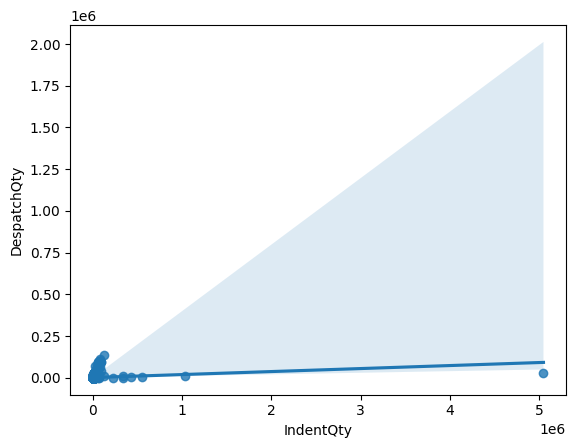

In [43]:
sns.regplot(data=df_2,y='DespatchQty',x='IndentQty')

Taking a look at the correlation between vaarious variables.
For location 1:

1)Indent Quantity is highly correlated with Despatch Qty which shows good demand forecasting occurence

2)Indent quantity is correlated with production quantity(0.5) which shows scope for improvement in production planning

3)The correlation between production and despatch quantity is currently 0.63 which shows scope for improvement in packing operations

4) indent value is highly correlated with balance value, which is a concern since increase in intended production should decrease the balance value, this shows that sales processes should get better

In [44]:
df_1[['IndentQty','ProductionQty','DespatchQty','BalanceQty','IndentValue','ProductionValue','DespatchValue','BalanceValue']].corr()

,IndentQty,ProductionQty,DespatchQty,BalanceQty,IndentValue,ProductionValue,DespatchValue,BalanceValue
IndentQty,1.000000,0.504703,0.831256,0.494715,0.500435,0.200586,0.398090,0.277044
ProductionQty,0.504703,1.000000,0.638968,-0.093367,0.261590,0.751207,0.464832,-0.063357
DespatchQty,0.831256,0.638968,1.000000,-0.071865,0.314305,0.300651,0.556037,-0.074124
BalanceQty,0.494715,-0.093367,-0.071865,1.000000,0.406534,-0.110126,-0.155015,0.612971
IndentValue,0.500435,0.261590,0.314305,0.406534,1.000000,0.380608,0.562898,0.742199
ProductionValue,0.200586,0.751207,0.300651,-0.110126,0.380608,1.000000,0.672552,-0.089126
DespatchValue,0.398090,0.464832,0.556037,-0.155015,0.562898,0.672552,1.000000,-0.136139
BalanceValue,0.277044,-0.063357,-0.074124,0.612971,0.742199,-0.089126,-0.136139,1.000000


In [45]:
df_2[['IndentQty','ProductionQty','DespatchQty','BalanceQty','IndentValue','ProductionValue','DespatchValue','BalanceValue']].corr()

,IndentQty,ProductionQty,DespatchQty,BalanceQty,IndentValue,ProductionValue,DespatchValue,BalanceValue
IndentQty,1.000000,0.147622,0.158709,0.993559,0.778875,0.068261,0.085260,0.779374
ProductionQty,0.147622,1.000000,0.956186,0.039616,0.107343,0.527821,0.502360,0.030698
DespatchQty,0.158709,0.956186,1.000000,0.045805,0.114268,0.430476,0.519954,0.034994
BalanceQty,0.993559,0.039616,0.045805,1.000000,0.774931,0.019658,0.026587,0.784534
IndentValue,0.778875,0.107343,0.114268,0.774931,1.000000,0.163888,0.189395,0.988143
ProductionValue,0.068261,0.527821,0.430476,0.019658,0.163888,1.000000,0.871048,0.030597
DespatchValue,0.085260,0.502360,0.519954,0.026587,0.189395,0.871048,1.000000,0.036393
BalanceValue,0.779374,0.030698,0.034994,0.784534,0.988143,0.030597,0.036393,1.000000


**Demand Forecasting**

Location 1

In the following barplot, the demand rise in month of October and November is clearly visible and the demand is lowest in the month of february and march.

Analysing such plots in greater detail alongwith more data will tremendously assist in demand forecasting

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '2023-04'),
  Text(1, 0, '2023-05'),
  Text(2, 0, '2023-06'),
  Text(3, 0, '2023-07'),
  Text(4, 0, '2023-08'),
  Text(5, 0, '2023-09'),
  Text(6, 0, '2023-10'),
  Text(7, 0, '2023-11'),
  Text(8, 0, '2023-12'),
  Text(9, 0, '2024-01'),
  Text(10, 0, '2024-02'),
  Text(11, 0, '2024-03')])

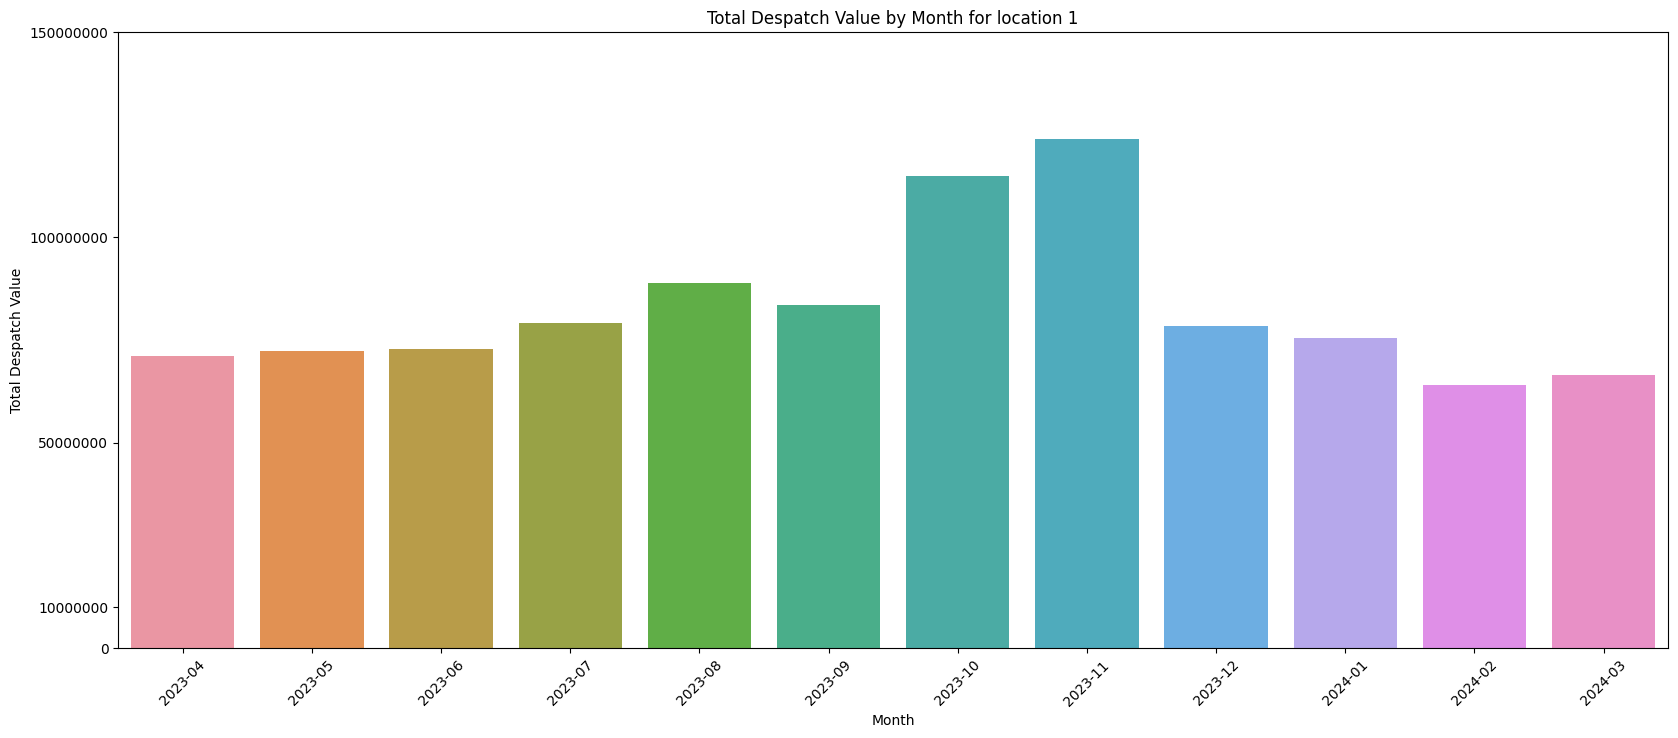

In [46]:
plt.figure(figsize=(20,8))
sum_1=df_1.groupby('Month')['DespatchValue'].sum().reset_index()
sns.barplot(data=sum_1,x='Month',y='DespatchValue',estimator=sum)
plt.title('Total Despatch Value by Month for location 1')
plt.xlabel('Month')
plt.ylabel('Total Despatch Value')
custom_ticks = [0, 10000000, 50000000, 100000000, 150000000]  # Example y-tick positions
custom_labels = ['0', '10000000', '50000000', '100000000', '150000000']  # Corresponding labels

# Set custom y-ticks
plt.yticks(custom_ticks, custom_labels)
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '2023-04'),
  Text(1, 0, '2023-05'),
  Text(2, 0, '2023-06'),
  Text(3, 0, '2023-07'),
  Text(4, 0, '2023-08'),
  Text(5, 0, '2023-09'),
  Text(6, 0, '2023-10'),
  Text(7, 0, '2023-11'),
  Text(8, 0, '2023-12'),
  Text(9, 0, '2024-01'),
  Text(10, 0, '2024-02'),
  Text(11, 0, '2024-03')])

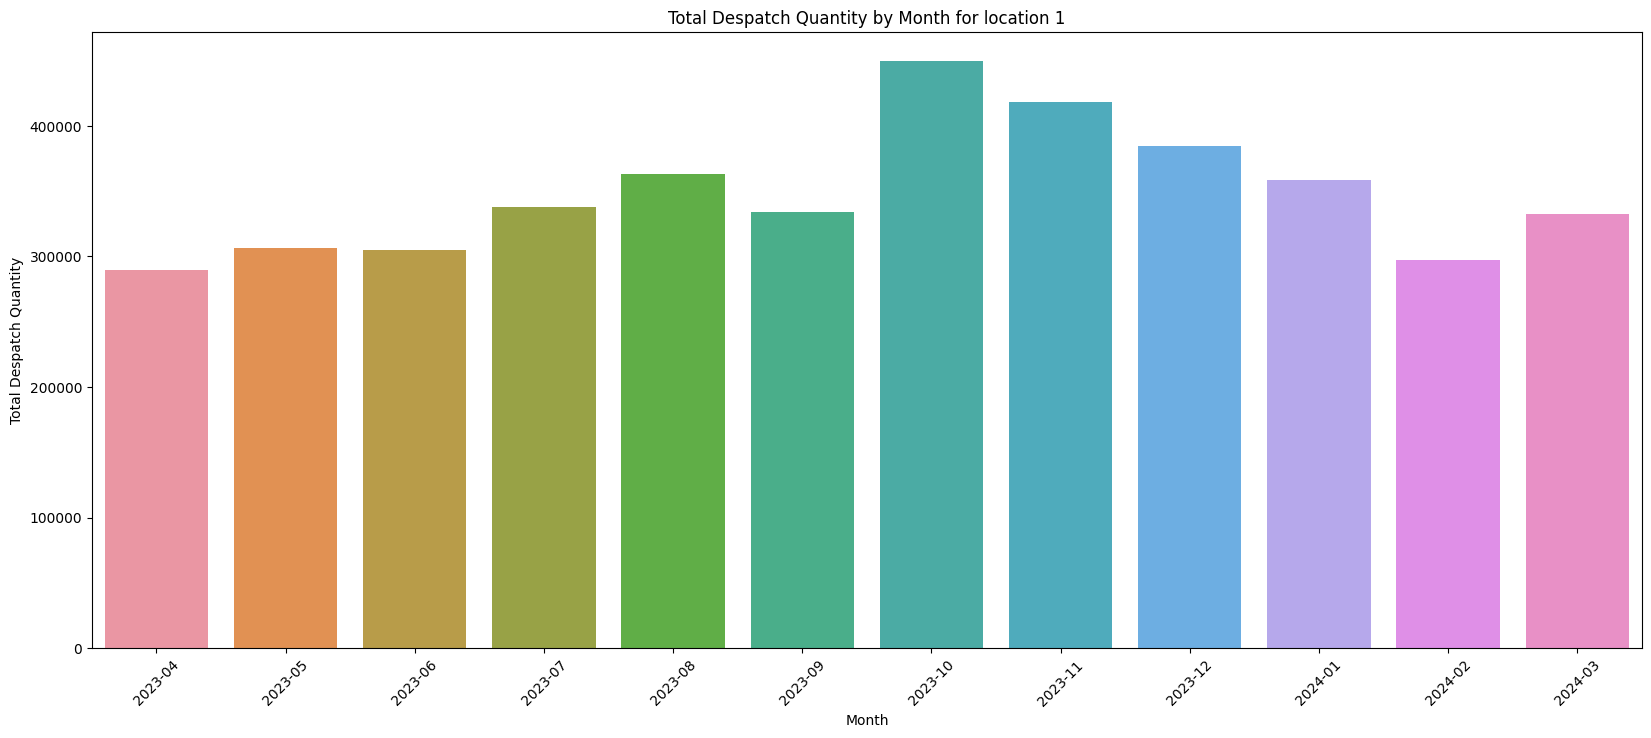

In [47]:
plt.figure(figsize=(20,8))
sum_2=df_1.groupby('Month')['DespatchQty'].sum().reset_index()
sns.barplot(data=sum_2,x='Month',y='DespatchQty',estimator=sum)
plt.title('Total Despatch Quantity by Month for location 1')
plt.xlabel('Month')
plt.ylabel('Total Despatch Quantity')

plt.xticks(rotation=45)

Location 2
The total sales values are higher as compared to location 1


In the following barplot, the demand rise in month of October and November is clearly visibl and it has a lot more diffrence between other months and itself e and the demand is lowest in the month ojune and f februach.

Analysing such plots in greater detail alongwith more data will tremendously assist in demand forecasting

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '2023-04'),
  Text(1, 0, '2023-05'),
  Text(2, 0, '2023-06'),
  Text(3, 0, '2023-07'),
  Text(4, 0, '2023-08'),
  Text(5, 0, '2023-09'),
  Text(6, 0, '2023-10'),
  Text(7, 0, '2023-11'),
  Text(8, 0, '2023-12'),
  Text(9, 0, '2024-01'),
  Text(10, 0, '2024-02'),
  Text(11, 0, '2024-03')])

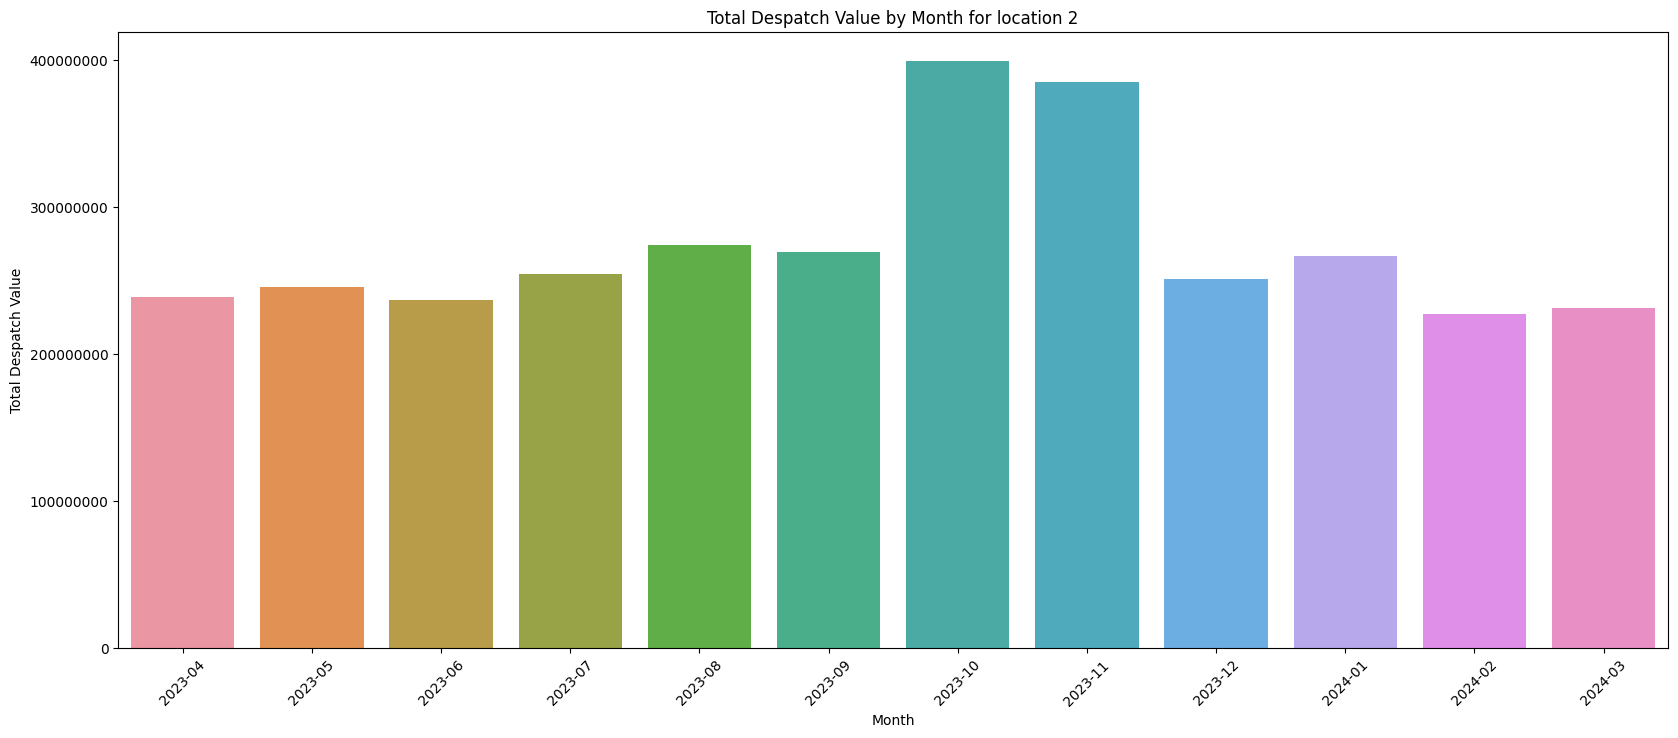

In [48]:
plt.figure(figsize=(20,8))
sum_3=df_2.groupby('Month')['DespatchValue'].sum().reset_index()
sns.barplot(data=sum_3,x='Month',y='DespatchValue',estimator=sum)
plt.title('Total Despatch Value by Month for location 2')
plt.xlabel('Month')
plt.ylabel('Total Despatch Value')
custom_ticks = [0, 100000000, 200000000, 300000000, 400000000]  # Example y-tick positions
custom_labels = ['0', '100000000', '200000000', '300000000', '400000000']  # Corresponding labels

# Set custom y-ticks
plt.yticks(custom_ticks, custom_labels)
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '2023-04'),
  Text(1, 0, '2023-05'),
  Text(2, 0, '2023-06'),
  Text(3, 0, '2023-07'),
  Text(4, 0, '2023-08'),
  Text(5, 0, '2023-09'),
  Text(6, 0, '2023-10'),
  Text(7, 0, '2023-11'),
  Text(8, 0, '2023-12'),
  Text(9, 0, '2024-01'),
  Text(10, 0, '2024-02'),
  Text(11, 0, '2024-03')])

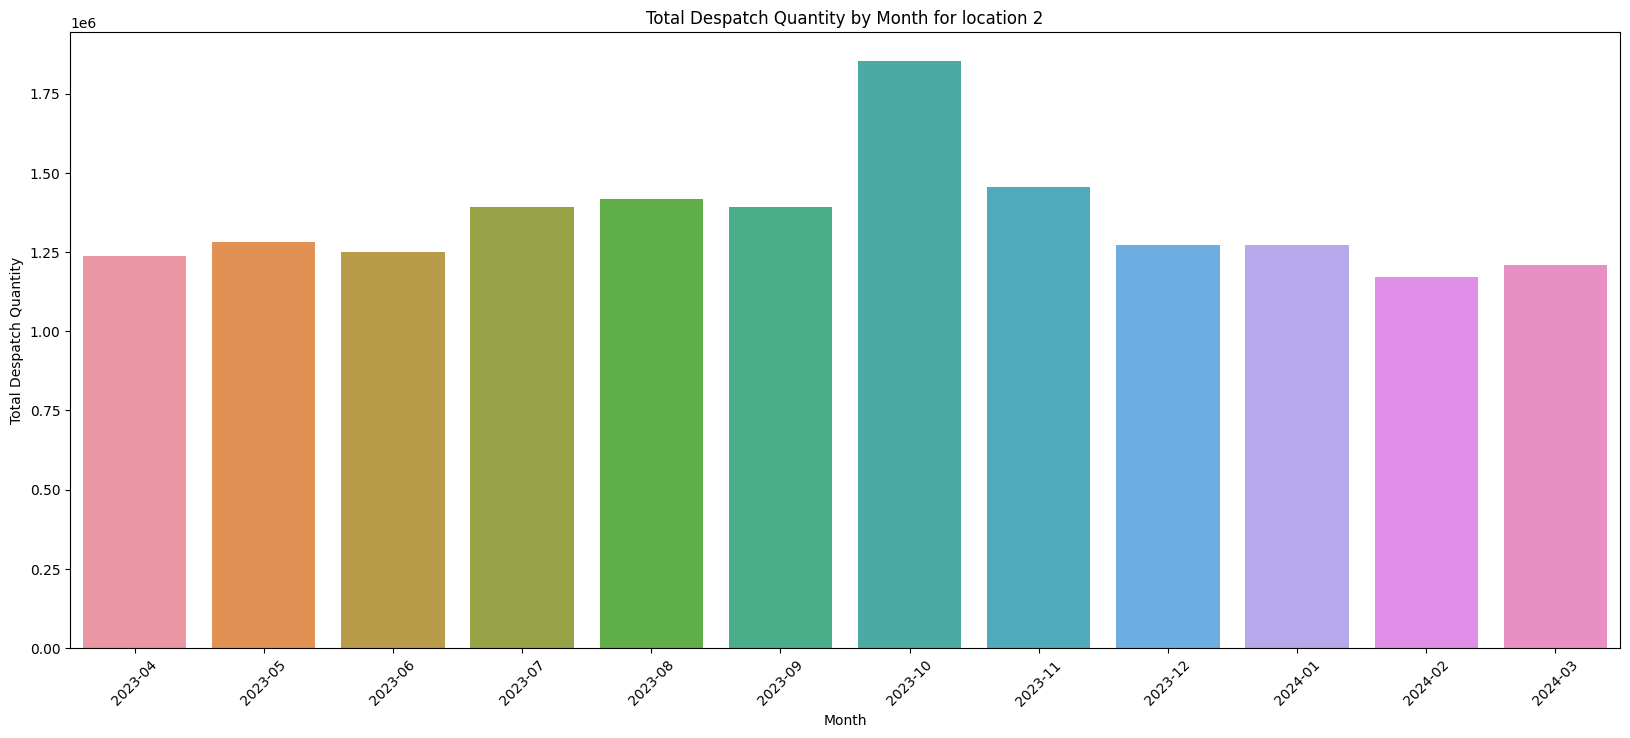

In [49]:
plt.figure(figsize=(20,8))
sum_4=df_2.groupby('Month')['DespatchQty'].sum().reset_index()
sns.barplot(data=sum_4,x='Month',y='DespatchQty',estimator=sum)
plt.title('Total Despatch Quantity by Month for location 2')
plt.xlabel('Month')
plt.ylabel('Total Despatch Quantity')

plt.xticks(rotation=45)

**Production Planning & Packaging Operations**

location 1

The following line plot shows that the production quantity is minimal in months apr-sept, then rockets up in oct-nov and gradually drop from dec-mar

this is the general trend followed by depatch and balance quantity but with exceptions:
the despatch quantity does not sky rocket as much as production quantity which calls for improvement in production planning

the balance quantity is high in december indicating incorrect demand forecasting and calling for betterment in production plaanning for december


The difference in production and despatch calls for accurate package solution

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

Text(0, 0.5, 'Qty')

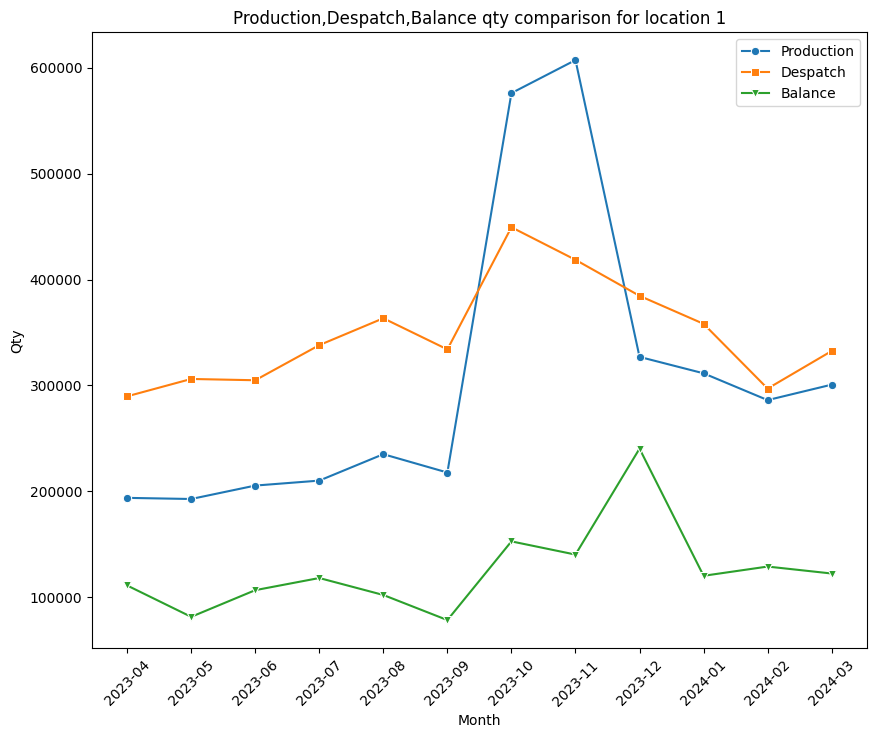

In [50]:
prod_1=df_1.groupby('Month')[['ProductionQty','DespatchQty','BalanceQty']].sum().reset_index()
plt.figure(figsize=(10,8))
sns.lineplot(data=prod_1,x='Month',y='ProductionQty',marker='o',label='Production')
sns.lineplot(data=prod_1,x='Month',y='DespatchQty',marker='s',label='Despatch')
sns.lineplot(data=prod_1,x='Month',y='BalanceQty',marker='v',label='Balance')
plt.legend()
plt.xticks(rotation=45)
plt.title('Production,Despatch,Balance qty comparison for location 1')
plt.xlabel('Month')
plt.ylabel('Qty')

In [53]:
prod_2=df_2.groupby('Month')[['ProductionQty','DespatchQty','BalanceQty']].sum().reset_index()

location 2

The production quantity and depatched quantity are in close proximity indicating great packaing operations and producion planning

But the way balance quantity skyrockets september shows the loopholes and thereby calls for better production planning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

Text(0, 0.5, 'Qty')

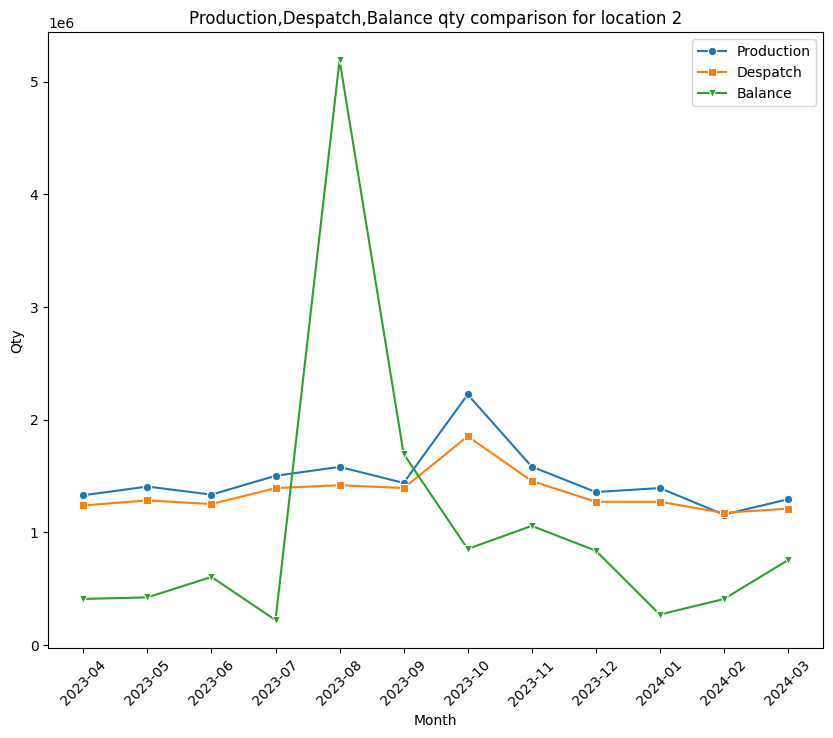

In [55]:
plt.figure(figsize=(10,8))
sns.lineplot(data=prod_2,x='Month',y='ProductionQty',marker='o',label='Production')
sns.lineplot(data=prod_2,x='Month',y='DespatchQty',marker='s',label='Despatch')
sns.lineplot(data=prod_2,x='Month',y='BalanceQty',marker='v',label='Balance')
plt.legend()
plt.xticks(rotation=45)
plt.title('Production,Despatch,Balance qty comparison for location 2')
plt.xlabel('Month')
plt.ylabel('Qty')

**Sales Processes**

For location 1 
the general trends for all 4 values are ideal, indent, production, despatch are in close proximity and balance values are less.
But in the months oct and Nov the production value increases significantly and the despatch value is not able to catchup indicating the inability of sales team to generate revenue, the demand is generally high in these months so better sales planning can increase the despatch values.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

Text(0, 0.5, 'Value')

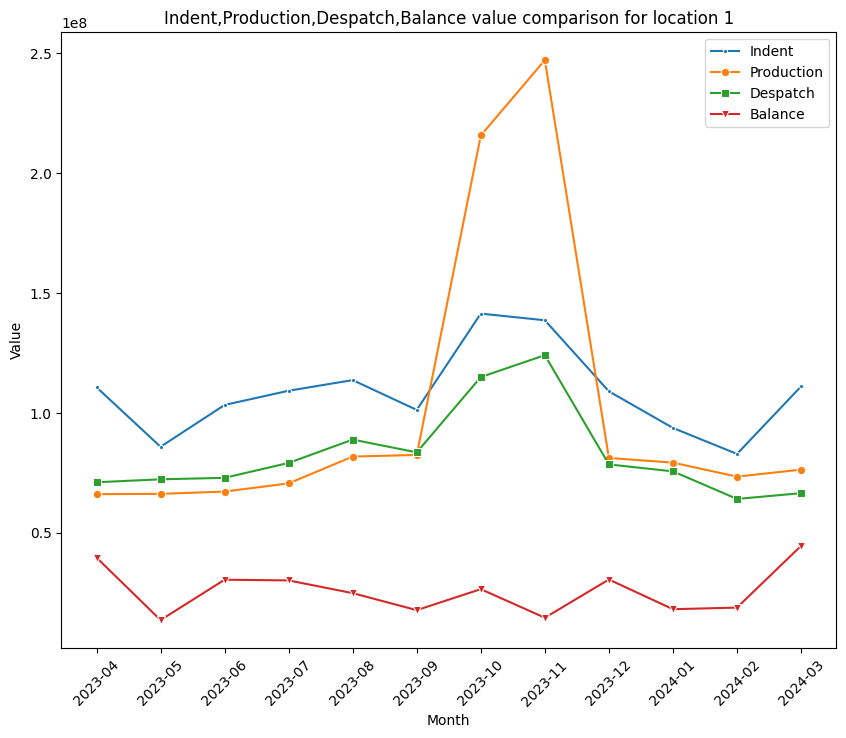

In [56]:
sales_1=df_1.groupby('Month')[['IndentValue','ProductionValue','DespatchValue','BalanceValue']].sum().reset_index()
plt.figure(figsize=(10,8))
sns.lineplot(data=sales_1,x='Month',y='IndentValue',marker='.',label='Indent')
sns.lineplot(data=sales_1,x='Month',y='ProductionValue',marker='o',label='Production')
sns.lineplot(data=sales_1,x='Month',y='DespatchValue',marker='s',label='Despatch')
sns.lineplot(data=sales_1,x='Month',y='BalanceValue',marker='v',label='Balance')
plt.legend()
plt.xticks(rotation=45)
plt.title('Indent,Production,Despatch,Balance value comparison for location 1')
plt.xlabel('Month')
plt.ylabel('Value')

for location 2

in months of august and october, indent values are high and the balance values are high again indicating poor return from sales team but close proximity of despatch and production values shows great planning

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

Text(0, 0.5, 'Value')

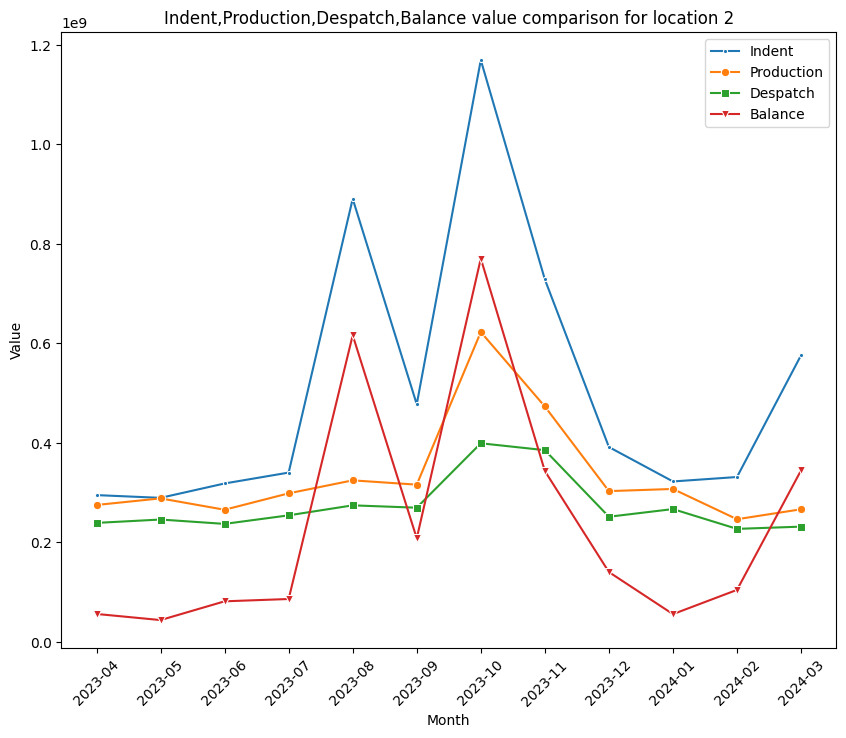

In [57]:
sales_2=df_2.groupby('Month')[['IndentValue','ProductionValue','DespatchValue','BalanceValue']].sum().reset_index()
plt.figure(figsize=(10,8))
sns.lineplot(data=sales_2,x='Month',y='IndentValue',marker='.',label='Indent')
sns.lineplot(data=sales_2,x='Month',y='ProductionValue',marker='o',label='Production')
sns.lineplot(data=sales_2,x='Month',y='DespatchValue',marker='s',label='Despatch')
sns.lineplot(data=sales_2,x='Month',y='BalanceValue',marker='v',label='Balance')
plt.legend()
plt.xticks(rotation=45)
plt.title('Indent,Production,Despatch,Balance value comparison for location 2')
plt.xlabel('Month')
plt.ylabel('Value')